# Cas Kaggle

# Introduccio a la base de dades

La base de dades que analitzaré en aquest Notebook s'anomena Dades de coches utilitzats.
L'objectiu principal serà predir el preu d'un vehicle enfunció d'unes dades d'entrada com pot ser el fabricant o la marca i també específiques com el quilometratge que té, el combustible que utilitza o el tipus de tracció.
La base de dades està composta per 26 atributs i 426880 instàncies.

# Llibreries

- Numpy: dona suport per crear vectors i matrius multidimensionals. Gran col·lecció de funcions matemàtiques d'alt nivell.
- Pandas: ofereix estructures de dades i operacions per manipular taules numèriques.
- Matplotlib: biblioteca per la generació de gràfiques de dades contingudes en llistes o arrays.
- Seaborn: serveix per generar gràfiques més complexes a partir de dades contingudes en llistes o arrays.
- Sklearn: inclou els models de classificacio, regressió i analisi de grups, a més de totes les operacions necessàries.

In [73]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for models
from sklearn.linear_model import LinearRegression

#Liblaries for cross validation and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Visualització de les dades

Abans de poder començar a realitzar la predicció, analitzaré les dades per saber com estan organitzades i quins atributs són els més significatius de la base de dades.

In [74]:
def load_dataset(path):
    dataset=pd.read_csv(path)
    return dataset

dataset = load_dataset("../dataset/vehicles.csv")
dataset.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [75]:
dataset.shape

(426880, 26)

Per a poder utilitzar les dades. He decidit fer una neteja d'atributs poc rellevants per a l'objectiu de la pràctica. Finalment queden 14 atributs.

In [76]:
dataset.drop(['id', 'url', 'region', 'region_url', 'image_url', 'title_status', 'size', 'VIN', 
              'description', 'county', 'lat', 'long', 'posting_date'], axis=1, inplace=True)
dataset.head()


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [77]:
dataset.shape

(426880, 13)

# Tractament de les dades

Per al tractament de dades NaN ja que hi ha en gran nombre a la base de dades, s'ha decidit fer un tractament avaçat i modificar el valor NaN per el valor de moda de cada atribut

In [78]:
    #price
dataset['price'].replace(0,np.nan,inplace=True)
dataset['price'].replace(1,np.nan,inplace=True)
dataset.dropna(subset=['price'], inplace = True)

    #condition
dataset['condition'].replace(np.nan, 'fair', inplace=True)

    #year
mean_year = dataset['year'].astype(float).mean(axis=0)
dataset['year'].replace(np.nan,mean_year, inplace = True)

    #fuel
dataset['fuel'].replace(np.nan,'gas',inplace = True)

    #odometer
mean_odometer = dataset['odometer'].astype(float).mean(axis=0)
dataset['odometer'].replace(np.nan,mean_odometer, inplace = True)

    #cylinders
dataset['cylinders'].replace(np.nan,'6 cylinders', inplace = True)

    #transmission
dataset['transmission'].replace(np.nan,'automatic', inplace = True)

    #drive
dataset['drive'].replace(np.nan,'4wd', inplace = True)

    #type
dataset['type'].replace(np.nan,'other',inplace = True)

Durant la realització de la pràctica s'ha observat que hi havia instancies que no tenien coherència entre tot el conjunt, és per aixó que s'ha establert un rang de preus (de 1000 a 60000), d'aquesta manera s'han evitat possibles dades errònies i s'han eliminat vehicles irrellevant, ja que podien ser exageradament cars o barats. També s'ha realitzat una modificació en l'atribut 'year' perquè mostri l'edat del vehicle i no l'any de matriculació. Pel cas de l'atribut fabricant, hi havia molts que eren insignificants dins del total, per tant, s'ha obtat per sumar tots els fabricants amb menys de 10000 vehicles i ajuntar-los en un nou tipus de fabricant ('others').

En el cas dels atributs categorics 'condition', 'transmission', 'type', 'drive', 'cylinders', 'fuel', s'ha obtat pasar-los a numèric mitjançant la funció get_dummies.

In [79]:
dataset['year'] = (2022 - dataset['year']).astype(int)

'''amb aquesta instruccio fem que el dataset només tingui vehicles de menys de 50 anys
i per tant no es consideren els historics'''
#dataset= dataset[dataset['year'] < 50]

mf = dataset['manufacturer'].value_counts()
dataset['manufacturer'] = dataset['manufacturer'].apply(lambda x: x if str(x) in mf[:10] else 'others')

dataset = dataset[dataset['price'] > 1000]
dataset = dataset[dataset['price'] < 60000]
kms_up = dataset['odometer'].quantile(0.99) 
kms_down = dataset['odometer'].quantile(0.1)  

dataset = dataset[(dataset['odometer'] < kms_up) & (dataset['odometer'] > kms_down)]

In [80]:
'''transformacion de datos categoricos a numericos'''
    #condition
condiciones= pd.get_dummies(dataset['condition']).reset_index()
    #transmision
transmisiones = pd.get_dummies(dataset['transmission']).reset_index()
transmisiones.rename(columns = {'other':'other_transmission'}, inplace = True)
    #tipo de vehiculo
tipos_vehiculo = pd.get_dummies(dataset['type']).reset_index()
tipos_vehiculo.rename(columns = {'other':'other_type'}, inplace =True)
    #tracciones
tracciones = pd.get_dummies(dataset['drive']).reset_index()
    #cilindrada
dataset["cylinders"].replace({"6 cylinders":"6","8 cylinders":"8","4 cylinders":"4",
                              "5 cylinders":"5", "3 cylinders":"3","10 cylinders":"10",
                              "12 cylinders":"12","other":"6"}, inplace = True)
dataset[["cylinders"]] = dataset[["cylinders"]].astype("int")
cilindrada = pd.get_dummies(dataset['cylinders']).reset_index()
    #combustible
combustible = pd.get_dummies(dataset['fuel']).reset_index()

dum_ds = pd.merge(condiciones, transmisiones, on = 'index')
dum_ds = pd.merge(dum_ds, combustible, how = 'inner')
dum_ds = pd.merge(dum_ds, tipos_vehiculo, how = 'inner')
dum_ds = pd.merge(dum_ds, tracciones, how = 'inner')
dum_ds = pd.merge(dum_ds, cilindrada, how = 'inner')

Matriu de correlació amb el total de vehicles:

<AxesSubplot:>

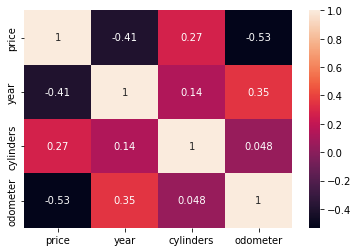

In [81]:
sns.heatmap(dataset.corr(), annot=True)

Podem observar que hi ha una correlació negativa entre el preu, l'edat del vehicle i el quilometratge i s'observa també que hi ha correlació positiva entre l'edat i el quilometratge. Amb aixó podem dir amb claredat que quant menys anys té el vehicle, més val aquest. De la mateixa manera amb el quilometratge. D'altre banda, es pot observar que quant més anys té, també augmentarà el quilometratge.

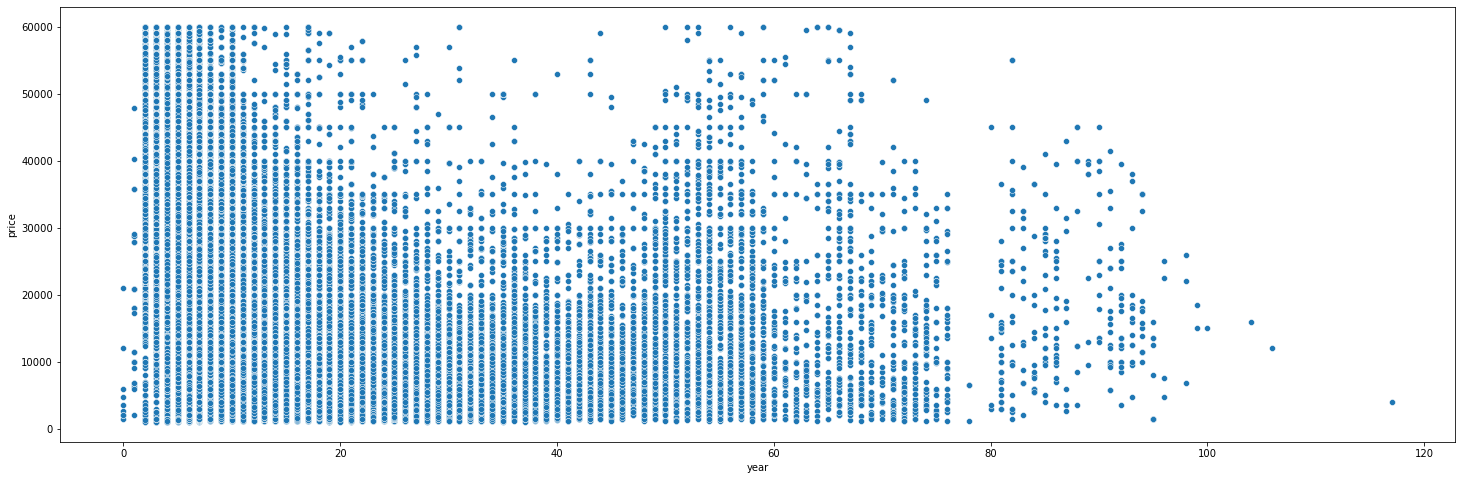

In [82]:
fig = plt.figure(figsize=(25, 8))
aux=plt.subplot()
aux=sns.scatterplot(data=dataset, x='year', y='price')

Aqui podem observar com els preus del vehicles disminueixen mentre el temps augmenta. També es pot percebir com a partir dels 50 anys el preu torna a pujar. El motiu es que els vehicles es cataloguen com a historics i per tant el preu augmenta.

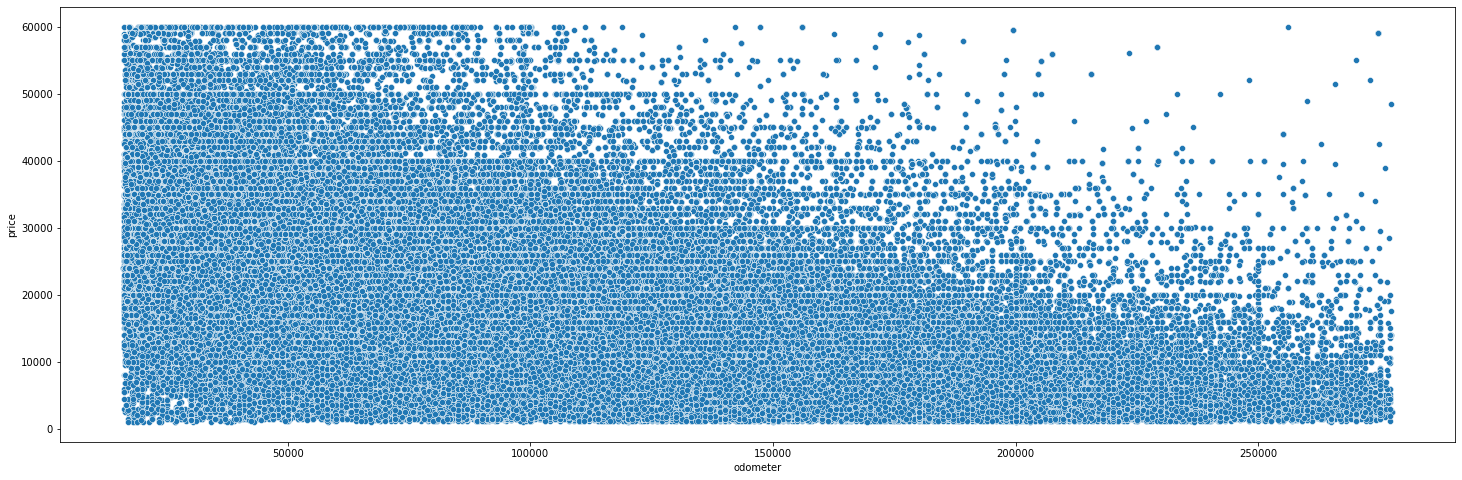

In [83]:
fig = plt.figure(figsize=(25, 8))
aux=plt.subplot()
aux=sns.scatterplot(data=dataset, x='odometer', y='price')

En quest gràfic s'observa com el preu disminueix metre el quilometratge augmenta

# Petit estudi dels atributs

Per tal d'entendre més els diferents atributs, mostrare una serie de gràfiques per veure com es relacionen amb l'atribut objectiu.

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

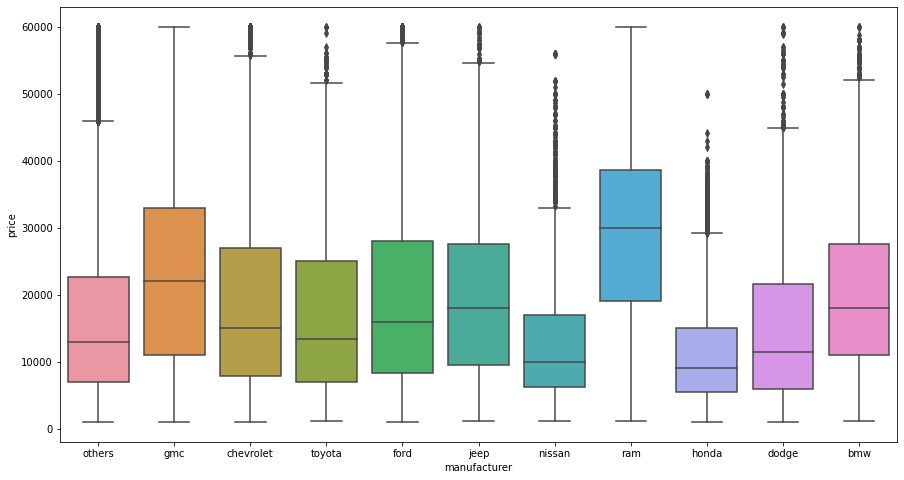

In [84]:
# precio vs fabricante
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset, x='manufacturer', y='price')


Podem observar que Ram és el fabricant amb vehicles més cars mentre que Honda és el més barat.

<AxesSubplot:xlabel='condition', ylabel='price'>

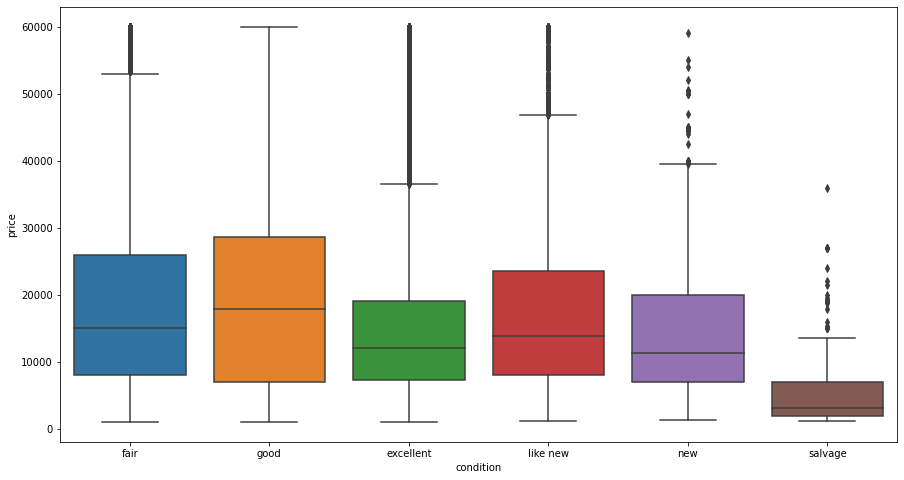

In [85]:
# precio vs condicion
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset, x='condition', y='price')

Com és d'esperar, els preus dels cotxes amb molt mala condició són els més baixos.

<AxesSubplot:xlabel='type', ylabel='price'>

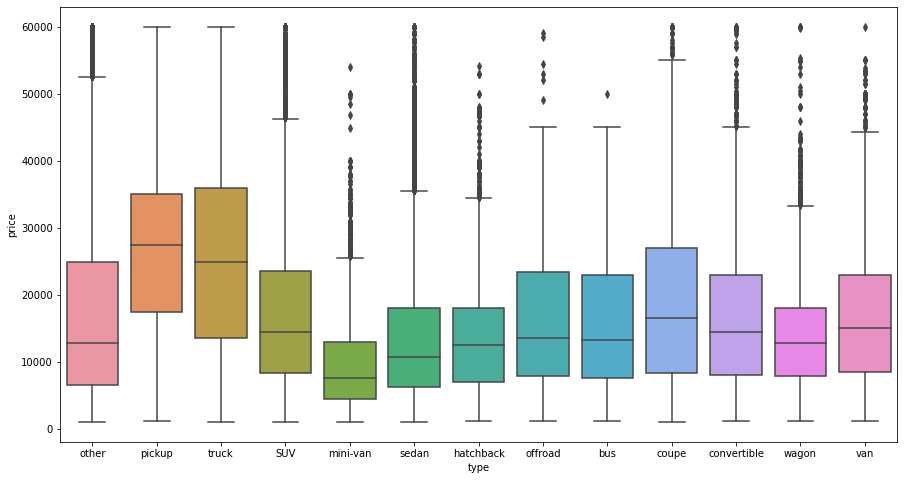

In [86]:
# precio vs tipo
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset, x='type', y='price')


Es pot observar que tant els camions com les pickups són el tipus de vehicle més car mentre que les mini-van són el mes barat.

In [87]:
# In[]:
contador_traccion = dataset['drive'].value_counts().to_frame()
contador_traccion.rename(columns={'drive': 'value_counts'}, inplace=True)

dataset_drive_type = dataset[['drive','type','price']]
dataset_drive_type = dataset_drive_type.groupby(['drive','type'],as_index=False).mean()

price_drive_type = dataset_drive_type.pivot(index='drive',columns='type')

print(price_drive_type.head())

              price                                                          \
type            SUV           bus   convertible         coupe     hatchback   
drive                                                                         
4wd    17699.502125  15653.417323  19078.436460  21346.782398  16866.987289   
fwd    14527.989358  13335.157895  10949.556507   9355.261093  11677.570881   
rwd    15199.792056  16205.676923  17908.294785  21358.598298  14836.031180   

                                                                             \
type       mini-van       offroad         other        pickup         sedan   
drive                                                                         
4wd     9226.177719  16279.522822  16850.261016  28555.677255  16132.113115   
fwd     9648.086197   9250.000000  12288.454012  18917.531058  10444.203453   
rwd    13119.030075  11727.500000  20298.933407  16859.388442  18313.563962   

                                                 


En aquesta taula es pot veure els diferents preus segons els tipus de vehicle i per cada tipus de tracció. S'observa com els vehicles amb tracció 4x4 són més cars independentment del tipus de vehicle, seguits de la tracció posterior i finalment la tracció davantera

# Regresions Lineals

S'han realitzat 2 tipus de regresions lineals i l'última s'ha validat mitjançant 'cross_validation' amb k = 5. La primera regressió s'ha fet unicament utilitzant els atributs de l'edat i el quilometratge. La segona s'ha realitzat mitjançant tots els atributs categòrics que s'han passat a numèrics, l'edat i el quilometratge.

In [88]:
'''Regresion lineal 1'''
X = dataset[['year', 'odometer']]
y = dataset[['price']] 

#primera regresion lineal observando edad, kms y precio
lm = LinearRegression()
lm.fit(X,y)
R2_lm = lm.score(X,y)
#prediccion del precio por cada vehiculo observando la edad y los kms
lm_prediccion_precio = lm.predict(X)
mae_lm = mean_absolute_error(dataset['price'], lm_prediccion_precio)
mse_lm = mean_squared_error(dataset['price'], lm_prediccion_precio)
print('R2_Score: ', R2_lm)
print('mean_absolute_error: ', mae_lm)
print('mean_squared_error: ', mse_lm)

R2_Score:  0.33840324911236097
mean_absolute_error:  7693.465901783356
mean_squared_error:  99004700.25309098


In [89]:
'''Regresion lineal 2'''
X2 = dataset[['year', 'odometer']].reset_index()
X2 = pd.merge(X2, dum_ds, on = 'index')
X2 = X2.drop(columns = ['index'])

y2 = dataset[['price']]

lm2 = LinearRegression()
lm2.fit(X2,y2)
lm2_prediccion_precio= lm2.predict(X2)
mae_lm2 = mean_absolute_error(dataset['price'], lm2_prediccion_precio)
mse_lm2 = mean_squared_error(dataset['price'], lm2_prediccion_precio)
R2_lm2 = r2_score(dataset['price'], lm2_prediccion_precio)
print('R2_Score: ', R2_lm2)
print('mean_absolute_error: ', mae_lm2)
print('mean_squared_error: ', mse_lm2)

R2_Score:  0.610884706592975
mean_absolute_error:  5660.141726642726
mean_squared_error:  58229190.1161388


In [90]:
'''cross_validation'''
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state = 4222)
lm3 = LinearRegression()
lm3.fit(x_train, y_train)
#cross validation con k = 5
cross = cross_val_score(lm3,X2,y2)
cross_prediccion_precio = cross_val_predict(lm3,X2,y2)
R2 = r2_score(dataset['price'], cross_prediccion_precio)
mae_cv = mean_absolute_error(dataset['price'], cross_prediccion_precio)
mse_cv = mean_squared_error(dataset['price'], cross_prediccion_precio)
print('R2_Score: ', R2)
print('mean_absolute_error: ', mae_cv)
print('mean_squared_error: ', mse_cv)

R2_Score:  0.6081526828074593
mean_absolute_error:  5680.852235229009
mean_squared_error:  58638024.040438466


Podem observar que en el primer regressor lineal s'ha obtingut un percentatge d'encerts del 34%, un molt mal resultat, però s'ha de tenir en compte que només s'utilitzaven les dades dels atributs edat i quilometratge. En el moment en el que s'utilitzen totes les dades com és en el cas del regressor lineal dos, el percentatge d'encerts practicament es duplica i arriba fins al 60%. No és un resultat esperançador, pero bastant millor que en el primer regressor lineal, cal afegir que les dades estan validades mitjançant cross_validation amb una k = 5.

(0.0, 60000.0)

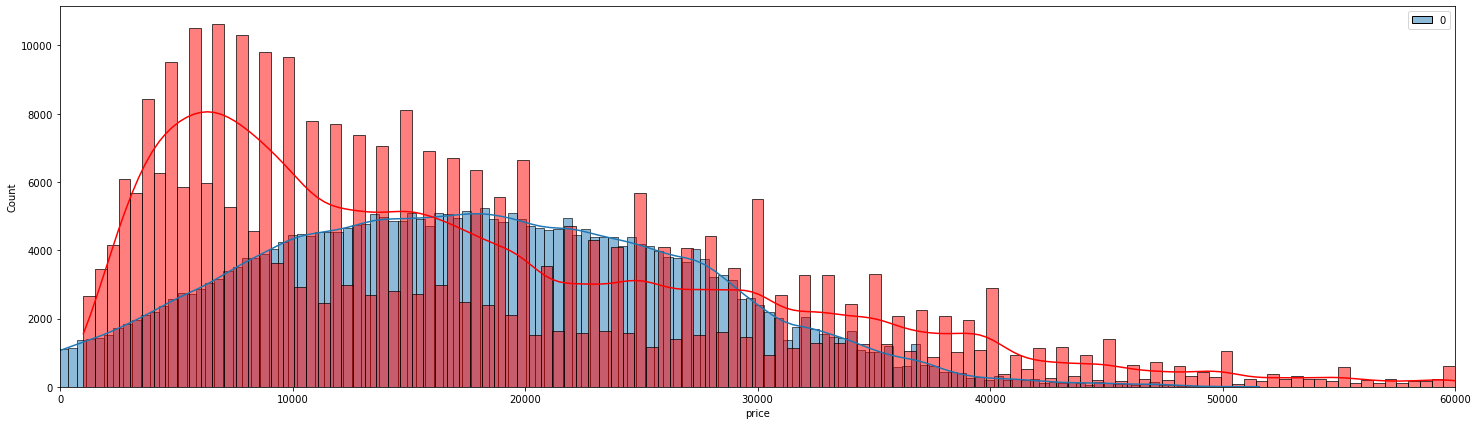

In [91]:
figure = plt.figure(figsize=(25, 7))
sns.histplot(data=lm2_prediccion_precio, color = 'b', kde=True)
sns.histplot(data=dataset['price'], color = 'r', kde=True)
plt.xlim(0,60000)

Aquí es pot observar la comparativa entre el preu real de cada vehicle (vermell) i el preu predit pel regressor lineal.

Per tal d'intentar augmentar el percentatge d'encerts en la predicció per part del regressor lineal, hem implementat els mateixos regressors perà la base de dades només tindrà vehicles més petits de 50 anys perquè el factor de que un vehicle sigui históric no esdevingui un incombenient. 

In [92]:
dataset_year= dataset[dataset['year'] < 50]
'''Regresion lineal 1'''
X_year = dataset_year[['year', 'odometer']]
y_year = dataset_year[['price']] 

#primera regresion lineal observando edad, kms y precio
lm = LinearRegression()
lm.fit(X_year,y_year)
R2_lm = lm.score(X_year,y_year)
#prediccion del precio por cada vehiculo observando la edad y los kms
lm_prediccion_precio = lm.predict(X_year)
mae_lm = mean_absolute_error(dataset_year['price'], lm_prediccion_precio)
mse_lm = mean_squared_error(dataset_year['price'], lm_prediccion_precio)
print('R2_Score: ', R2_lm)
print('mean_absolute_error: ', mae_lm)
print('mean_squared_error: ', mse_lm)

R2_Score:  0.37377805108889905
mean_absolute_error:  7516.200887702131
mean_squared_error:  93696484.5857917


In [93]:
'''Regresion lineal 2'''
X2 = dataset[['year', 'odometer']].reset_index()
X2 = pd.merge(X2, dum_ds, on = 'index')
X2 = X2.drop(columns = ['index'])
X2_year = X2[X2['year'] < 50]
y2_year = dataset_year[['price']]

lm2 = LinearRegression()
lm2.fit(X2_year,y2_year)
lm2_prediccion_precio= lm2.predict(X2_year)
mae_lm2 = mean_absolute_error(dataset_year['price'], lm2_prediccion_precio)
mse_lm2 = mean_squared_error(dataset_year['price'], lm2_prediccion_precio)
R2_lm2 = r2_score(dataset_year['price'], lm2_prediccion_precio)
print('R2_Score: ', R2_lm2)
print('mean_absolute_error: ', mae_lm2)
print('mean_squared_error: ', mse_lm2)

R2_Score:  0.6490638845235733
mean_absolute_error:  5397.719706110458
mean_squared_error:  52507709.75292422


In [94]:
'''cross_validation'''
x_train, x_test, y_train, y_test = train_test_split(X2_year, y2_year, test_size = 0.3, random_state = 4222)
lm3 = LinearRegression()
lm3.fit(x_train, y_train)
#cross validation con k = 5
cross = cross_val_score(lm3,X2_year,y2_year)
cross_prediccion_precio = cross_val_predict(lm3,X2_year,y2_year)
R2 = r2_score(dataset_year['price'], cross_prediccion_precio)
mae_cv = mean_absolute_error(dataset_year['price'], cross_prediccion_precio)
mse_cv = mean_squared_error(dataset_year['price'], cross_prediccion_precio)
print('R2_Score: ', R2)
print('mean_absolute_error: ', mae_cv)
print('mean_squared_error: ', mse_cv)

R2_Score:  0.6465453518228447
mean_absolute_error:  5418.36311836072
mean_squared_error:  52884537.267167315


Podem observar que el percentatge d'encerts a augmentat fins el 65% en la segona regressió

(0.0, 60000.0)

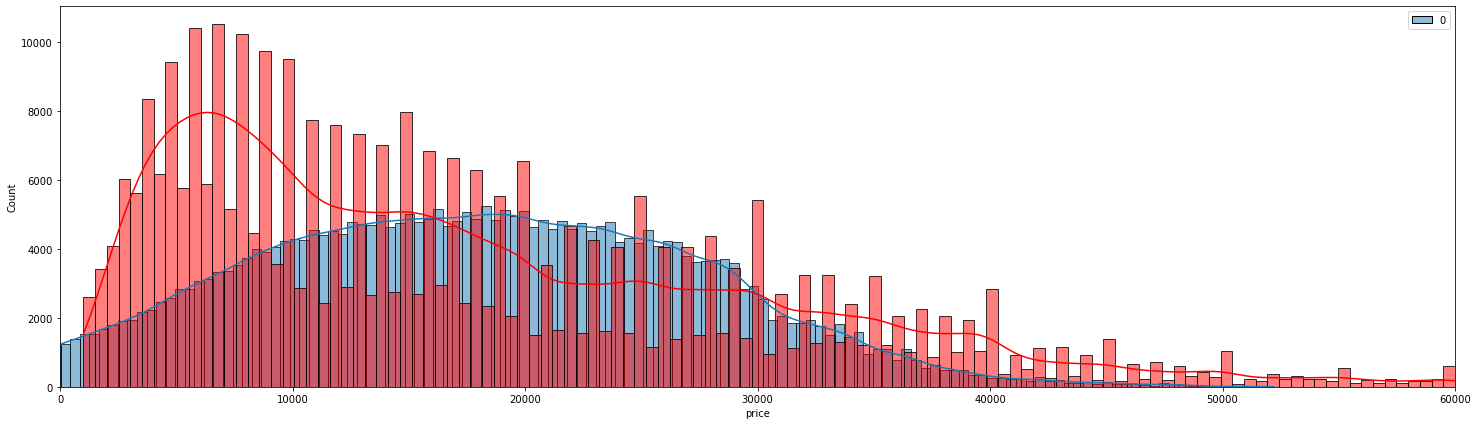

In [95]:
figure = plt.figure(figsize=(25, 7))
sns.histplot(data=lm2_prediccion_precio, color = 'b', kde=True)
sns.histplot(data=dataset_year['price'], color = 'r', kde=True)
plt.xlim(0,60000)

En quant a la grafica comparativa entre el preu real y el predit pel regressor lineal no s'observa una gran diferencia amb la grafica on es miren tots els vehicles.

# Conclusions

Ja que el percentatge obtingut pel Regressor Lineal no és extremadament bó, no podem afirmar al 100% que el preu d'un vehicle estigui directament relacionat a les seves característiques. També es interessant mencionar que la base de dades conté diferents tipus de vehicles i, per tant, no tots tenen el mateix valor a futur ni tots devaluen de la mateixa manera. Per exemple, un cotxe històric tindrà més valor que un camió històric.

Certament podriem establir un rang de preus de -5500 a 5500 on el preu predit fos 0. D'aquesta manera podem considerar que el preu real es troba dins del rang de preus. Quant més petit sigui el rang de preus inicial (l'utilitzat pel Regressor Lineal es de 1000 a 60000), més precisió obtindrem alhora de predir el preu.

Pel que fa a la Regressió Lineal on s'utilitzen dades de vehicles amb menys de 50 anys, no podem considerar tampoc per suficientment bons els resultats. El rang de preus passaria de ser d'11000 a 10600 sent una baixada mínima.
